# **Classificação**

## Importando bibliotecas:

In [61]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree as tr
from sklearn import ensemble as en
from sklearn import metrics as mt
from sklearn import linear_model as lm
from matplotlib import pyplot as plt

## Carregando dados:

In [2]:
X_train = pd.read_csv('/Users/lehre/Desktop/CIENCIA_DADOS/ComunidadeDS/REPOS/fundamentos-ml/notebooks/projeto_aluno-ml/classificacao/X_training.csv')
y_train = pd.read_csv('/Users/lehre/Desktop/CIENCIA_DADOS/ComunidadeDS/REPOS/fundamentos-ml/notebooks/projeto_aluno-ml/classificacao/y_training.csv')
X_teste = pd.read_csv('/Users/lehre/Desktop/CIENCIA_DADOS/ComunidadeDS/REPOS/fundamentos-ml/notebooks/projeto_aluno-ml/classificacao/X_test.csv')
y_teste = pd.read_csv('/Users/lehre/Desktop/CIENCIA_DADOS/ComunidadeDS/REPOS/fundamentos-ml/notebooks/projeto_aluno-ml/classificacao/y_test.csv')
X_val = pd.read_csv('/Users/lehre/Desktop/CIENCIA_DADOS/ComunidadeDS/REPOS/fundamentos-ml/notebooks/projeto_aluno-ml/classificacao/X_validation.csv')
y_val = pd.read_csv('/Users/lehre/Desktop/CIENCIA_DADOS/ComunidadeDS/REPOS/fundamentos-ml/notebooks/projeto_aluno-ml/classificacao/y_validation.csv')

In [3]:
# ajustando formato dos dados para que possam ser processados pelo scikit-learn
y_train = y_train.values.ravel()
y_teste = y_teste.values.ravel()
y_val = y_val.values.ravel()

X_train = np.asarray(X_train)
X_teste = np.asarray(X_teste)
X_val = np.asarray(X_val)

## Funções:

In [11]:
def error(data_type, model_name, y, yhat):
    acc = mt.accuracy_score(y, yhat)
    precision = mt.precision_score(y, yhat)
    recall = mt.recall_score(y, yhat)
    f1 = mt.f1_score(y, yhat)
    
    return pd.DataFrame({'Data Type': data_type,
                        'Model Name': model_name,
                        'Accuracy': acc,
                        'Precision': precision,
                        'Recall': recall,
                        'F1 Score': f1}, index=[1]).round(3)

# **1.0 K-Nearest Neighbors**

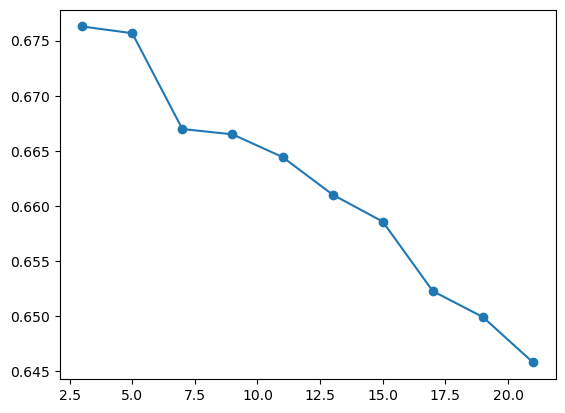

In [4]:
k_list = [3,5,7,9,11,13,15,17,19,21]
val_score = []

for k in k_list:
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    y_pred_val = knn_classifier.predict(X_val)   
    acc_val = mt.accuracy_score(y_val, y_pred_val)
    val_score.append(acc_val)
    
plt.plot(k_list, val_score, '-o');

In [78]:
# sobre dados de treinamento:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_train)

knn_error_y_pred = error('Training', 'K-Nearest Neighbors', y_train, y_pred)

# sobre dados de validação:
y_pred_val = knn_classifier.predict(X_val)

knn_error_y_pred_val = error('Validation', 'K-Nearest Neighbors', y_val, y_pred_val)

# sobre dados de teste:
knn_classifier.fit(np.concatenate((X_train, X_val)),
                   np.concatenate((y_train, y_val)))
y_pred_teste = knn_classifier.predict(X_teste)

knn_error_y_pred_teste = error('Test', 'K-Nearest Neighbors', y_teste, y_pred_teste)


result_knn = pd.concat([knn_error_y_pred, knn_error_y_pred_val, knn_error_y_pred_teste], ignore_index=True)
result_knn

,Data Type,Model Name,Accuracy,Precision,Recall,F1 Score
0,Training,K-Nearest Neighbors,0.832,0.812,0.797,0.805
1,Validation,K-Nearest Neighbors,0.676,0.628,0.621,0.625
2,Test,K-Nearest Neighbors,0.688,0.648,0.635,0.642


# **2.0 Decision Tree**

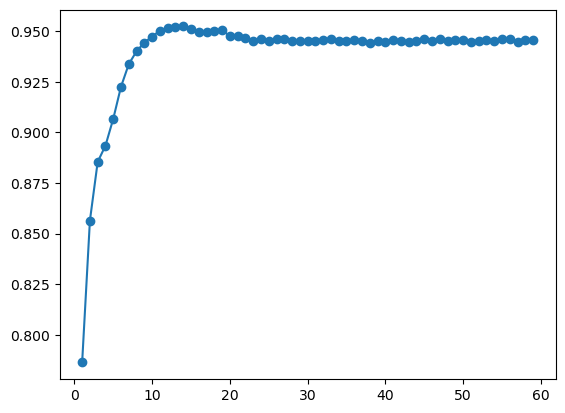

In [55]:
values = np.arange(1, 60, 1)
val_score = []

for i in values:
    tree = tr.DecisionTreeClassifier(max_depth=i)
    tree.fit(X_train, y_train)
    y_pred_val = tree.predict(X_val)
    acc_val = mt.accuracy_score(y_val, y_pred_val)
    val_score.append(acc_val)

plt.plot(values, val_score, '-o');

In [35]:
# achando índice do valor máximo do plot:
depth = val_score.index(max(val_score))
depth

13

In [51]:
# sobre dados de treinamento:
tree = tr.DecisionTreeClassifier(max_depth=14)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_train)

tree_error_y_pred = error('Training', 'Decision Tree', y_train, y_pred)

# sobre dados de validação:
y_pred_val = tree.predict(X_val)

tree_error_y_pred_val = error('Validation', 'Decision Tree', y_val, y_pred_val)

# sobre dados de teste:
tree.fit(np.concatenate((X_train, X_val)),
         np.concatenate((y_train, y_val)))
y_pred_teste = tree.predict(X_teste)

tree_error_y_pred_teste = error('Test', 'Decision Tree', y_teste, y_pred_teste)


result_tree = pd.concat([tree_error_y_pred, tree_error_y_pred_val, tree_error_y_pred_teste], ignore_index=True)
result_tree

,Data Type,Model Name,Accuracy,Precision,Recall,F1 Score
0,Training,Decision Tree,0.974,0.982,0.959,0.970
1,Validation,Decision Tree,0.952,0.956,0.932,0.944
2,Test,Decision Tree,0.956,0.956,0.943,0.950


# **3.0 Random Forest**

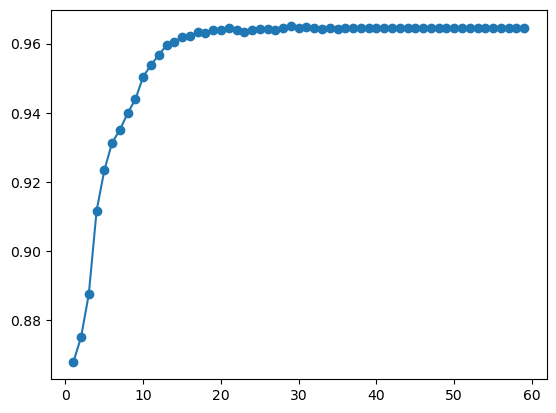

In [56]:
values = np.arange(1, 60, 1)
val_score = []

for i in values:
    random = en.RandomForestClassifier(max_depth=i, random_state=0)
    random.fit(X_train, y_train)
    y_pred_val = random.predict(X_val)
    acc_val = mt.accuracy_score(y_val, y_pred_val)
    val_score.append(acc_val)

plt.plot(values, val_score, '-o');

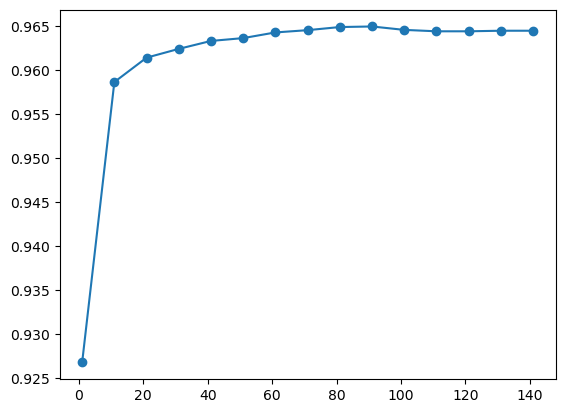

In [57]:
values = np.arange(1, 150, 10)
val_score = []

for i in values:
    random = en.RandomForestClassifier(n_estimators=i, random_state=0)
    random.fit(X_train, y_train)
    y_pred_val = random.predict(X_val)
    acc_val = mt.accuracy_score(y_val, y_pred_val)
    val_score.append(acc_val)

plt.plot(values, val_score, '-o');

In [59]:
# sobre dados de treinamento:
random = en.RandomForestClassifier(max_depth=29, n_estimators=90, random_state=0)
random.fit(X_train, y_train)
y_pred = random.predict(X_train)

random_error_y_pred = error('Training', 'Random Forest', y_train, y_pred)

# sobre dados de validação:
y_pred_val = random.predict(X_val)

random_error_y_pred_val = error('Validation', 'Random Forest', y_val, y_pred_val)

# sobre dados de teste:
random.fit(np.concatenate((X_train, X_val)),
           np.concatenate((y_train, y_val)))
y_pred_teste = random.predict(X_teste)

random_error_y_pred_teste = error('Test', 'Random Forest', y_teste, y_pred_teste)


result_random = pd.concat([random_error_y_pred, random_error_y_pred_val, random_error_y_pred_teste], ignore_index=True)
result_random

,Data Type,Model Name,Accuracy,Precision,Recall,F1 Score
0,Training,Random Forest,1.000,1.000,1.000,1.000
1,Validation,Random Forest,0.965,0.974,0.944,0.959
2,Test,Random Forest,0.965,0.973,0.946,0.959


# **4.0 Logistic Regression**

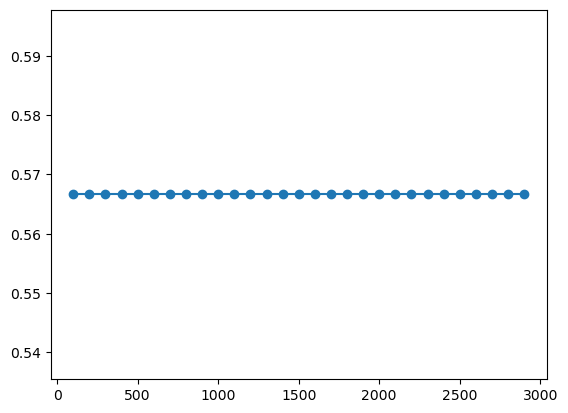

In [62]:
values = np.arange(100, 3000, 100)
val_score = []

for i in values:
    log_reg = lm.LogisticRegression(max_iter=i, random_state=0)
    log_reg.fit(X_train, y_train)
    y_pred_val = log_reg.predict(X_val)
    acc_val = mt.accuracy_score(y_val, y_pred_val)
    val_score.append(acc_val)

plt.plot(values, val_score, '-o');

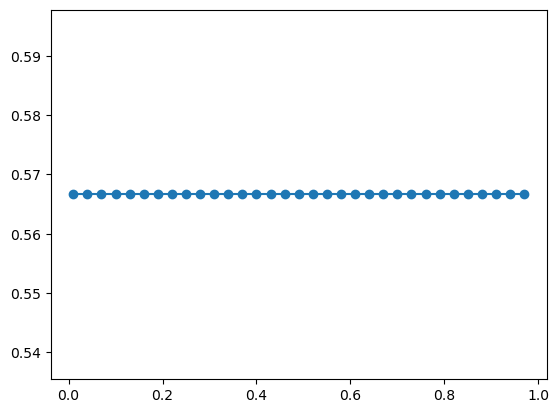

In [73]:
values = np.arange(0.01, 1.0, 0.03)
val_score = []

for i in values:
    log_reg = lm.LogisticRegression(C=i, random_state=0)
    log_reg.fit(X_train, y_train)
    y_pred_val = log_reg.predict(X_val)
    acc_val = mt.accuracy_score(y_val, y_pred_val)
    val_score.append(acc_val)

plt.plot(values, val_score, '-o');

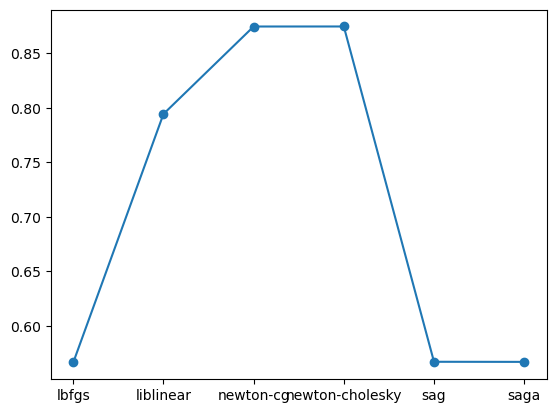

In [70]:
values = (['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'])
val_score = []

for i in values:
    log_reg = lm.LogisticRegression(solver=i, random_state=0)
    log_reg.fit(X_train, y_train)
    y_pred_val = log_reg.predict(X_val)
    acc_val = mt.accuracy_score(y_val, y_pred_val)
    val_score.append(acc_val)

plt.plot(values, val_score, '-o');

In [76]:
# sobre dados de treinamento:
log_reg = lm.LogisticRegression(max_iter=1000, C=0.566, solver='newton-cg', random_state=0)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_train)

log_error_y_pred = error('Training', 'Logistic Regression', y_train, y_pred)

# sobre dados de validação:
y_pred_val = log_reg.predict(X_val)

log_error_y_pred_val = error('Validation', 'Logistic Regression', y_val, y_pred_val)

# sobre dados de teste:
log_reg.fit(np.concatenate((X_train, X_val)),
            np.concatenate((y_train, y_val)))
y_pred_teste = log_reg.predict(X_teste)

log_error_y_pred_teste = error('Test', 'Logistic Regression', y_teste, y_pred_teste)


result_log = pd.concat([log_error_y_pred, log_error_y_pred_val, log_error_y_pred_teste], ignore_index=True)
result_log

,Data Type,Model Name,Accuracy,Precision,Recall,F1 Score
0,Training,Logistic Regression,0.876,0.872,0.837,0.854
1,Validation,Logistic Regression,0.874,0.869,0.836,0.852
2,Test,Logistic Regression,0.872,0.868,0.835,0.851


# **Classificação - Resultado final:**

In [79]:
training = pd.concat([knn_error_y_pred, tree_error_y_pred, random_error_y_pred, log_error_y_pred], ignore_index=True)
validation = pd.concat([knn_error_y_pred_val, tree_error_y_pred_val, random_error_y_pred_val, log_error_y_pred_val], ignore_index=True)
test = pd.concat([knn_error_y_pred_teste, tree_error_y_pred_teste, random_error_y_pred_teste, log_error_y_pred_teste], ignore_index=True)

result = pd.concat([training, validation, test], ignore_index=True).round(3)
result

,Data Type,Model Name,Accuracy,Precision,Recall,F1 Score
0,Training,K-Nearest Neighbors,0.832,0.812,0.797,0.805
1,Training,Decision Tree,0.974,0.982,0.959,0.970
2,Training,Random Forest,1.000,1.000,1.000,1.000
3,Training,Logistic Regression,0.876,0.872,0.837,0.854
4,Validation,K-Nearest Neighbors,0.676,0.628,0.621,0.625
5,Validation,Decision Tree,0.952,0.956,0.932,0.944
6,Validation,Random Forest,0.965,0.974,0.944,0.959
7,Validation,Logistic Regression,0.874,0.869,0.836,0.852
8,Test,K-Nearest Neighbors,0.688,0.648,0.635,0.642
9,Test,Decision Tree,0.956,0.956,0.943,0.950
